In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [78]:
def train_hopfield(N,v):
    W = np.zeros((N,N))
    for i in range(0,N-1):
        for j in range(i+1,N):
            W[i,j] = v[i]*v[j]
    W = W+ np.transpose(W)
    return W

In [79]:
def sigmoid(x):
    return np.tanh(x)
def invsigmoid(x):
    return np.arctanh(x)

def continuous_hopfield_neuron(u,t,W):
    dudt= []
    N = W.shape[0]
    #neuron constants set to 1
    C=np.ones((N))
    R=np.ones((N))
    I=np.ones((N))

    for i in range(0,N):
        dui = - u[i]/R[i] + I[i]
        for j in range(0,N):
            dui+=W[i,j]*sigmoid(u[j])
        dudt.append(dui/C[i])
    return np.array(dudt)

def run_continuous_hopfield(W,v0,steps,T):
    t = np.linspace(0, T, steps)
    u0 = invsigmoid(v0)
    sol = sp.integrate.odeint(continuous_hopfield_neuron, u0, t, args=(W,))
    v_sol = sigmoid(sol)
    return v_sol

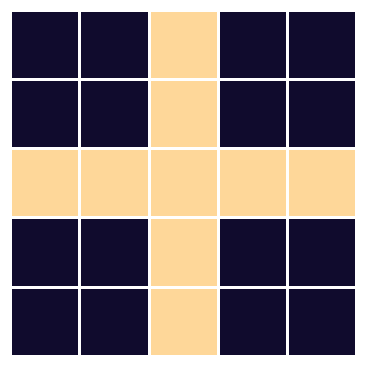

In [80]:
N = 5*5
memory = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
])
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4,4)
sns.heatmap(memory,cmap='magma',cbar=False,ax=ax,vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
plt.tight_layout()
plt.axis('off')
plt.show()
memory = 2*memory-1
W = train_hopfield(N,memory.flatten())

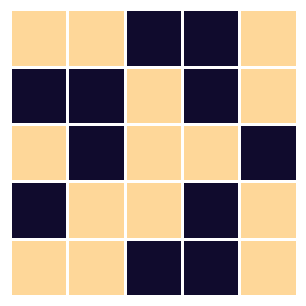

In [118]:
M = 5
N = M*M
IC = np.array([
    [1, 1, 0, 0, 1],
    [0, 0, 1, 0, 1],
    [1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 1, 0, 0, 1]
])
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4,4)
sns.heatmap(IC,cmap='magma',cbar=False,ax=ax,vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
plt.tight_layout()
plt.axis('off')
plt.show()
IC = 0.99*(2*IC-1)
states = run_continuous_hopfield(W,IC.flatten(),101,0.8)

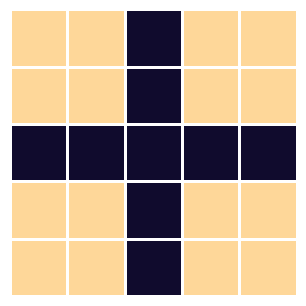

In [119]:
show_state = (states[len(states)-1].reshape(5,5)+1)/2
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4,4)
sns.heatmap(show_state,cmap='magma',cbar=False,ax=ax,vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
plt.tight_layout()
plt.axis('off')
plt.show()


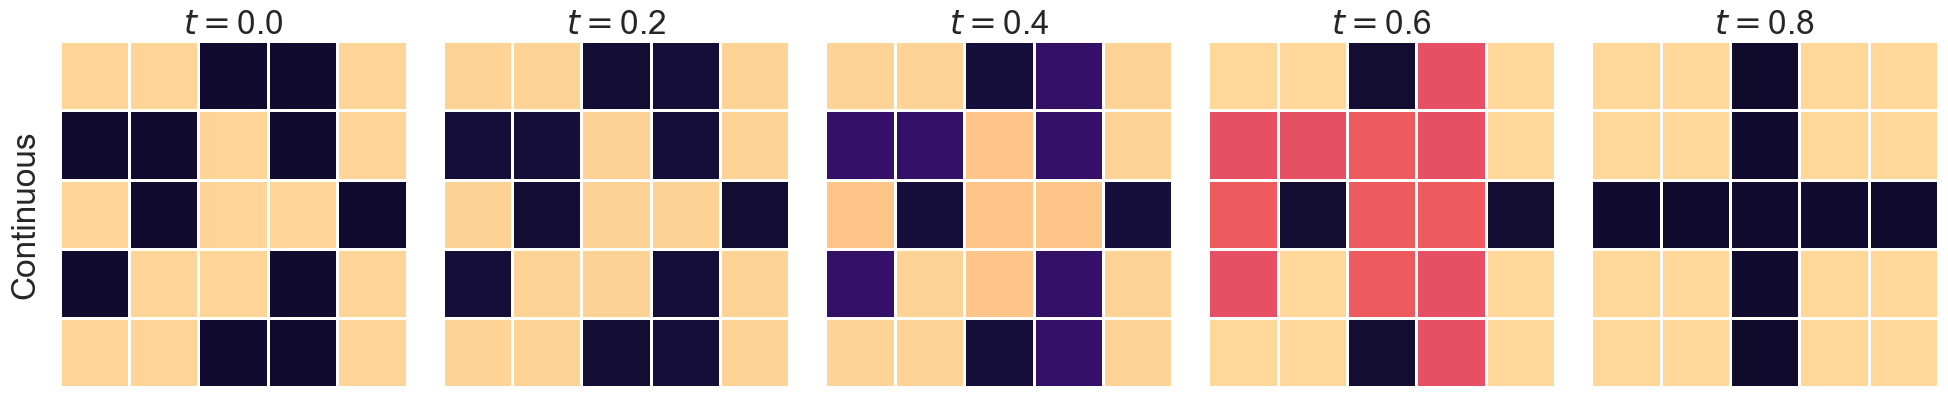

In [132]:
sns.set(font_scale=2)
fig, ax = plt.subplots(1,5)
fig.set_size_inches(20,4.5)
seq =[0,20,40,60,80]
for i in range(0,5):
    show_state = (states[seq[i]].reshape(5,5)+1)/2
    sns.heatmap(show_state,cmap='magma',cbar=False,ax=ax[i],vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
    ax[i].axis('off')
    ax[i].set_title(r'$t=$'+str(seq[i]/100))
ax[0].axis('on')
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_ylabel('Continuous')
plt.tight_layout()
plt.show()

fig.savefig('cross_converge_cont.pdf', format="pdf", bbox_inches="tight")